In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv("../../data/favorita_rawdata/train.csv")
df_items = pd.read_csv("../../data/favorita_rawdata/items.csv")
df_stores = pd.read_csv("../../data/favorita_rawdata/stores.csv")
df_test = pd.read_csv("../../data/favorita_rawdata/test.csv")
df_transactions = pd.read_csv("../../data/favorita_rawdata/transactions.csv")
df_events = pd.read_csv("../../data/favorita_rawdata/holidays_events.csv")

/var/folders/7q/jqlzwn8x48x2shzm6_zhgvbh0000gn/T/ipykernel_84236/3463941573.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("../data/favorita-grocery-sales-forecasting/train.csv")


In [3]:
df_train.shape, df_items.shape, df_stores.shape, df_test.shape, df_transactions.shape, df_events.shape

((125497040, 6), (4100, 4), (54, 5), (3370464, 5), (83488, 3), (350, 6))

In [4]:
# merge data
df_temp_train = pd.merge(df_train, df_items, how="left", on=["item_nbr"])
df_temp_train = pd.merge(df_temp_train, df_stores, how="left", on=["store_nbr"])
# type transformations
df_temp_train.date = pd.to_datetime(df_temp_train.date)
df_temp_train.onpromotion = df_temp_train.onpromotion.astype(float)
# removing onpromotion nan's
df_temp_train = df_temp_train.dropna()

dataset_train = df_temp_train.copy()
del df_temp_train

In [5]:
# df_temp_train_agg_family = df_temp_train.groupby(['family']).agg({'unit_sales': sum})
# df_temp_train_agg_family = df_temp_train_agg_family.sort_values(by='unit_sales', ascending = False)
# df_temp_train_agg_family['percentage'] = df_temp_train_agg_family['unit_sales'].cumsum()/df_temp_train_agg_family['unit_sales'].sum()
# df_temp_train_agg_family.iloc[:10].index

In [6]:
# df_temp_train_agg = df_temp_train[df_temp_train['family'].isin(['GROCERY I', 'BEVERAGES', 'PRODUCE', 'CLEANING', 'DAIRY',
#        'BREAD/BAKERY', 'POULTRY', 'MEATS', 'PERSONAL CARE', 'DELI'])]\
#                     .groupby(['date', 'family']).agg({'unit_sales': sum})

#### check relevant products

In [9]:
sales_by_product = dataset_train.groupby(['item_nbr']).agg({"unit_sales": "sum"})

<AxesSubplot: >

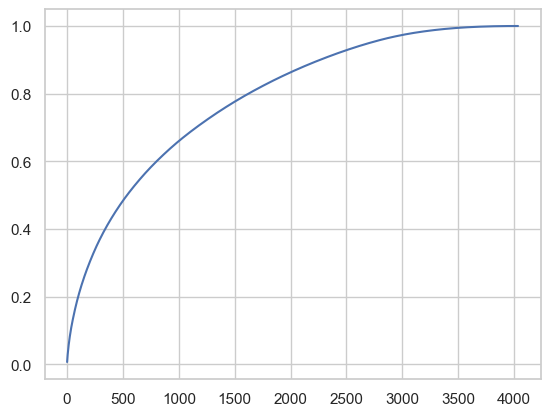

In [10]:
sales_by_product = sales_by_product.sort_values(by="unit_sales", ascending=False)
sales_by_product["representation"] = (sales_by_product.cumsum() / sales_by_product.sum())

relevant_products = sales_by_product[sales_by_product.representation<=0.8].index

sales_by_product.reset_index()["representation"].plot()

In [11]:
dataset_train = dataset_train[dataset_train.item_nbr.isin(relevant_products)]

In [12]:
# merge data
df_temp_test = pd.merge(df_test, df_items, how="left", on=["item_nbr"])
df_temp_test = pd.merge(df_temp_test, df_stores, how="left", on=["store_nbr"])
# type transformations
df_temp_test.date = pd.to_datetime(df_temp_test.date)
df_temp_test.onpromotion = df_temp_test.onpromotion.astype(float)
# removing onpromotion nan's
# df_temp_test = df_temp_test.dropna()

dataset_test = df_temp_test.copy()
# del df_temp_test

In [13]:
# df_temp_test_agg_family = df_temp_test.groupby(['family']).agg({'unit_sales': sum})
# df_temp_test_agg_family = df_temp_test_agg_family.sort_values(by='unit_sales', ascending = False)
# df_temp_test_agg_family['percentage'] = df_temp_test_agg_family['unit_sales'].cumsum()/df_temp_test_agg_family['unit_sales'].sum()

In [14]:
if True:
    dataset_train.to_csv("../../data/intermediante_files/raw_dataset_train.csv")
    dataset_test.to_csv("../../data/intermediante_files/raw_dataset_test.csv")